In [16]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
folders = '/content/drive/MyDrive/pic_noArgument/dataset'

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import PIL.ImageOps  
import numpy as np
from skimage.feature import hog

In [19]:
list_folders = (sorted(os.listdir(folders)))
print(list_folders)
print(len(list_folders))

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
89


In [20]:
FJoin = os.path.join

In [21]:
f_data_final = ['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
print(f_data_final)

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


In [22]:
def change_Arr(link, label):
    list_arr = []
    for img_link in link:
        img = Image.open(img_link).convert('L')   ## to change the img into 1D array
        im, imghog = hog(img, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True)
        list_arr.append(np.asarray(imghog).flatten())
        plt.imshow(imghog)
    return np.array(list_arr), np.array(label)

In [23]:
link_img_train = []
label_img_train = []

index = 0
for char in f_data_final:
    link = '/content/drive/MyDrive/pic_noArgument/MNISTfake' + '/' + char
    list_name_img = os.listdir(link)
    for name_img in list_name_img:
        link_img_train.append(link + '/' + name_img)
        label_img_train.append(index)
    index += 1

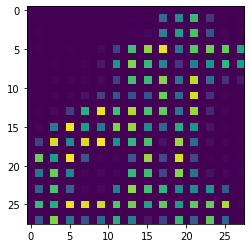

In [24]:
data_train_final, label_train_final = change_Arr(link_img_train, label_img_train)

In [25]:
pd.DataFrame(data_train_final).to_csv('/content/drive/MyDrive/Dataframe_training_final_CNN.csv', header= None, index=None)

In [26]:
pd.DataFrame(label_train_final).to_csv('/content/drive/MyDrive/Labelframe_training_final_CNN.csv', header= None, index=None)

In [27]:
link_img_test = []
label_img_test = []

index = 0
for char in f_data_final:
    link = '/content/drive/MyDrive/pic_noArgument/MNISTfake_test' + '/' + char
    list_name_img = os.listdir(link)
    for name_img in list_name_img:
        link_img_test.append(link + '/' + name_img)
        label_img_test.append(index)
    index += 1

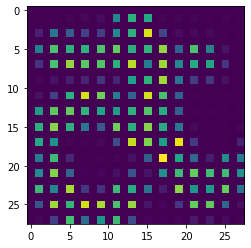

In [28]:
data_test_final, label_test_final = change_Arr(link_img_test, label_img_test)

In [29]:
pd.DataFrame(data_test_final).to_csv('/content/drive/MyDrive/Dataframe_testing_final_CNN.csv', header= None, index=None)

In [30]:
pd.DataFrame(label_test_final).to_csv('/content/drive/MyDrive/Labelframe_testing_final_CNN.csv', header= None, index=None)